In [1]:
import sqlite3
import pandas as pd

# Connect to DB
conn = sqlite3.connect('Sales_database.db')
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Clear existing data
cursor.execute("DELETE FROM sales")

# Insert new rows
data = [
    ('Pencils', 10, 10.0),
    ('Erazers', 5, 5.0),
    ('Scales', 10, 15.0),
    ('Note Books', 20, 60.0),
    ('Pencils', 15, 10.0),
    ('Erazers', 25, 5.0),
    ('Scales', 30, 15.0),
    ('Note Books', 10, 60.0),
    ('Pencils', 40, 10.0),
    ('Erazers', 30, 5.0),
    ('Scales', 15, 15.0),
    ('Note Books', 40, 60.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

# ✅ Commit changes!
conn.commit()

# Fetch into DataFrame
query = "SELECT * FROM sales"
df = pd.read_sql_query(query, conn)

print(df)
conn.close()

    id     product  quantity  price
0    1     Pencils        10   10.0
1    2     Erazers         5    5.0
2    3      Scales        10   15.0
3    4  Note Books        20   60.0
4    5     Pencils        15   10.0
5    6     Erazers        25    5.0
6    7      Scales        30   15.0
7    8  Note Books        10   60.0
8    9     Pencils        40   10.0
9   10     Erazers        30    5.0
10  11      Scales        15   15.0
11  12  Note Books        40   60.0


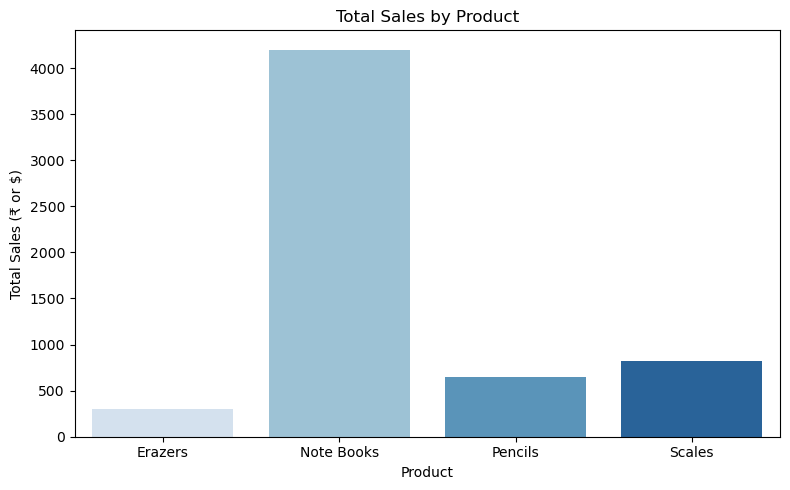

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already populated with your SQL data
# Example: df = pd.read_sql_query("SELECT * FROM sales", conn)

# 1. Calculate total sales per row
df['total_sales'] = df['quantity'] * df['price']

# 2. Group by product and sum total sales
summary = df.groupby('product')['total_sales'].sum().reset_index()

# 3. Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x='product',
    y='total_sales',
    hue='product',
    palette='Blues',
    legend=False
)

# 4. Customize the chart
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales (₹ or $)')
plt.tight_layout()

# 5. Show it
plt.show()